<a href="https://colab.research.google.com/github/stevejj4/Data-Cleaning/blob/main/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth #Authorizing google colab
auth.authenticate_user()
import gspread #credentials for google sheet
from google.auth import default
creds,_ = default()
gc = gspread.authorize(creds) #Authorizing the connection
import pandas as pd
worksheet = gc.open('House_Prices').sheet1 #defining the worksheet
rows = worksheet.get_all_values() #getting all values in list of row
df = pd.DataFrame(rows)
df.columns = df.iloc[0] #creating columns name
df = df.iloc[1:]

In [ ]:
#df.head()

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
#df.describe()

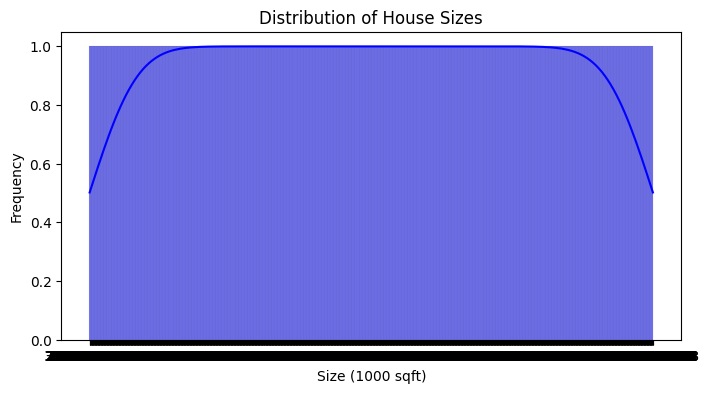

In [15]:
#Data Visualization
#Histogram for house sizes

plt.figure(figsize=(8,4))
sns.histplot(df['Size (1000 sqft)'] , bins = 30, kde = True, color = 'blue') # Changed 'colour' to 'color'
plt.title('Distribution of House Sizes')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Distribution of House Prices')

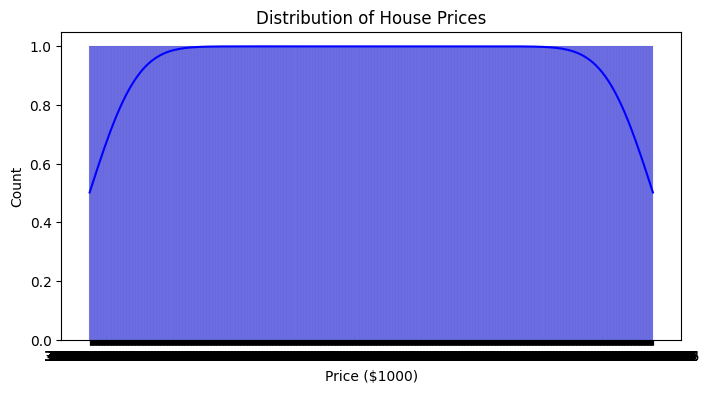

In [16]:
# Histogram for house  prices
plt.figure(figsize=(8,4))
sns.histplot(df['Price ($1000)'] , bins = 30, kde = True, color = 'blue') # Changed 'colour' to 'color'
plt.title('Distribution of House Prices')

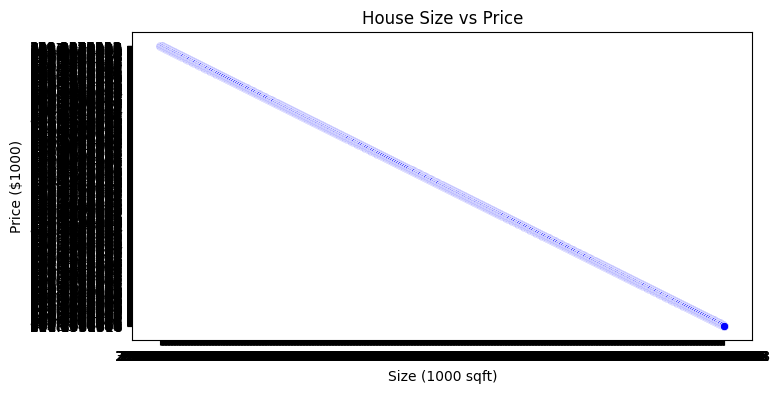

In [18]:
#Scatter plot for house sizes vs . prices
plt.figure(figsize=(8,4)) # Changed '==' to '='
sns.scatterplot(x=df['Size (1000 sqft)'], y=df['Price ($1000)'], color = 'blue')
plt.title('House Size vs Price')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price ($1000)')
plt.show()

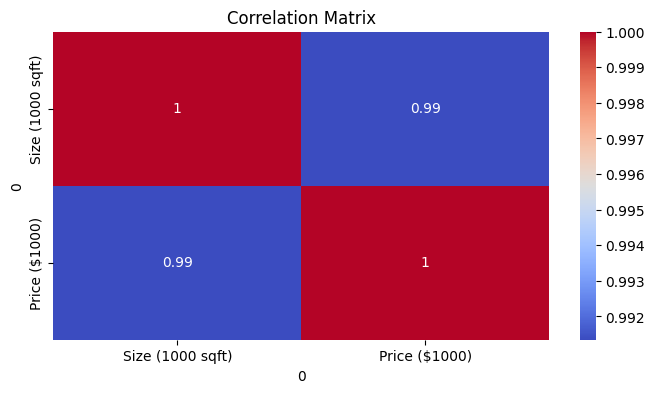

In [19]:
# correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Check missing
#df.isnull().sum()

In [23]:
from sklearn.model_selection import train_test_split

# Features and targets variable
X = df[['Size (1000 sqft)']].values
y = df['Price ($1000)'].values

#Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 1050
Testing set size: 450


In [26]:
# Training the model
# Initalize the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

#model parameters
theta0 = model.intercept_
theta1 = model.coef_[0]  # Access the slope directly

print(f"Theta0 (intercept): {theta0}")
print(f"Theta1 (slope): {theta1}")

Theta0 (intercept): 50.36205024985645
Theta1 (slope): 99.88011769715527


In [27]:
# Evaluating the model
from sklearn.metrics import mean_squared_error

# Predictions on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training MSE: 92.09593695654137
Testing MSE: 99.72084424851174


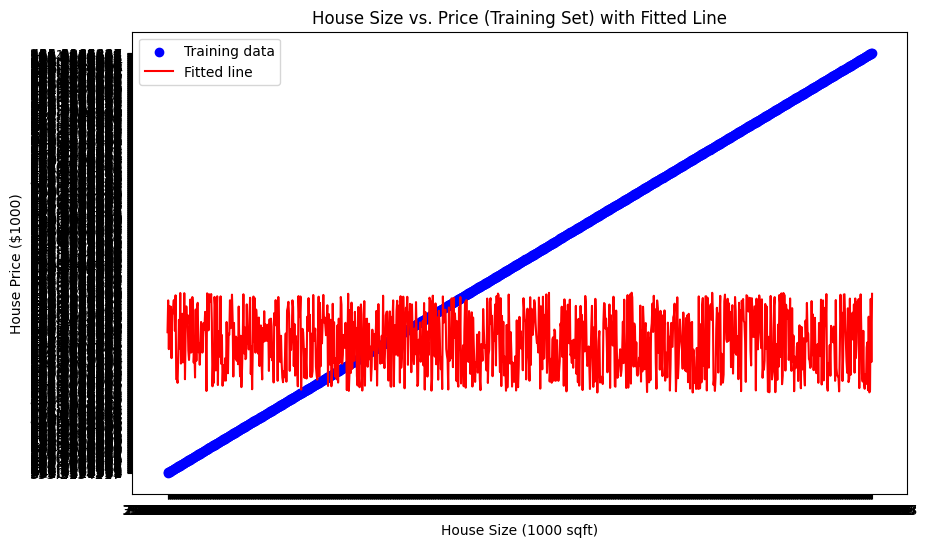

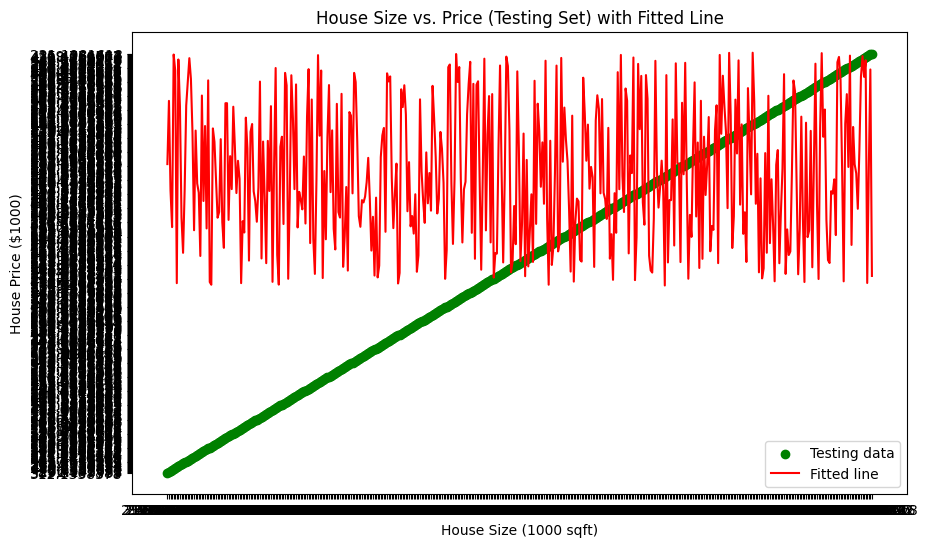

In [29]:
# Visualizing the result
# Plot the data and the fitted line for the training set
plt.figure(figsize=(10, 6))
# Convert X_train and y_train to 1D arrays if they are not already
plt.scatter(X_train.ravel(), y_train.ravel(), color='blue', label='Training data')
plt.plot(X_train.ravel(), y_train_pred, color='red', label='Fitted line')
plt.xlabel("House Size (1000 sqft)")
plt.ylabel("House Price ($1000)")
plt.title("House Size vs. Price (Training Set) with Fitted Line")
plt.legend()
plt.show()

# Plot the data and the fitted line for the testing set
plt.figure(figsize=(10, 6))
# Convert X_test and y_test to 1D arrays if they are not already
plt.scatter(X_test.ravel(), y_test.ravel(), color='green', label='Testing data')
plt.plot(X_test.ravel(), y_test_pred, color='red', label='Fitted line')
plt.xlabel("House Size (1000 sqft)")
plt.ylabel("House Price ($1000)")
plt.title("House Size vs. Price (Testing Set) with Fitted Line")
plt.legend()
plt.show()